# Detecção de Doenças no Milho utilizando Redes Neurais

## Trabalho de Inteligência Artificial

## Guilherme Zanin - RA: 221026479

Trabalho destinado método avaliativo da matéria de Inteligência Artificial - Detecção de Doenças no Milho utilizando Redes Neurais

In [28]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image

In [2]:
# Caminho da pasta principal
base_dir = './data'

In [3]:
# Verificar subpastas
subfolders = [f.name for f in os.scandir(base_dir) if f.is_dir()]
print("Classes encontradas:", subfolders)

Classes encontradas: ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']


## Carregamento das Imagens presentes nas pastas

In [4]:
# Listar algumas imagens de cada subpasta
for subfolder in subfolders:
    subfolder_path = os.path.join(base_dir, subfolder)
    images = [f for f in os.listdir(subfolder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    print(f"Imagens na pasta '{subfolder}':\n", images)
    print("\n")

Imagens na pasta 'Blight':
 ['Corn_Blight (1).jpeg', 'Corn_Blight (1).jpg', 'Corn_Blight (10).jpg', 'Corn_Blight (100).jpg', 'Corn_Blight (1000).JPG', 'Corn_Blight (1001).JPG', 'Corn_Blight (1002).JPG', 'Corn_Blight (1003).JPG', 'Corn_Blight (1004).JPG', 'Corn_Blight (1005).JPG', 'Corn_Blight (1006).JPG', 'Corn_Blight (1007).JPG', 'Corn_Blight (1008).JPG', 'Corn_Blight (1009).JPG', 'Corn_Blight (101).jpg', 'Corn_Blight (1010).JPG', 'Corn_Blight (1011).jpg', 'Corn_Blight (1012).JPG', 'Corn_Blight (1013).JPG', 'Corn_Blight (1014).JPG', 'Corn_Blight (1015).jpg', 'Corn_Blight (1016).JPG', 'Corn_Blight (1017).JPG', 'Corn_Blight (1018).jpg', 'Corn_Blight (1019).JPG', 'Corn_Blight (102).jpg', 'Corn_Blight (1020).JPG', 'Corn_Blight (1021).JPG', 'Corn_Blight (1022).JPG', 'Corn_Blight (1023).JPG', 'Corn_Blight (1024).JPG', 'Corn_Blight (1025).JPG', 'Corn_Blight (1026).JPG', 'Corn_Blight (1027).JPG', 'Corn_Blight (1028).JPG', 'Corn_Blight (1029).JPG', 'Corn_Blight (103).jpg', 'Corn_Blight (1030).

## Colocar as Imagens em um único vetor

In [5]:
# Coletar todos os nomes de imagens das subpastas
image_names = []
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        image_names.extend(image_files)  # Adicionar os nomes à lista principal

## Verificação se há imagens repetidas dentro de cada pasta

In [6]:
# Verificar duplicatas
unique_names = set(image_names)
if len(unique_names) == len(image_names):
    print("Todos os nomes são únicos.")
else:
    print(f"Atenção: Existem {len(image_names) - len(unique_names)} nomes duplicados.")

Todos os nomes são únicos.


## Normalizacao das Imagens

In [7]:
# Gerador de dados com normalização
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 20% para teste

## Divisão das Imagens em Treino e Teste

## Treino

In [8]:
# Dados de treinamento
train_data = data_gen.flow_from_directory(
    base_dir,
    target_size=(224, 224),   # Redimensionar as imagens para 224x224
    batch_size=32,            # Tamanho do lote
    class_mode='categorical', # Multiclasse
    subset='training'         # Subconjunto para treino (80% dos dados)
)

Found 3352 images belonging to 4 classes.


## Verificação das Classes das imagens de Treino

In [9]:
# Obter as classes reais (nomes) de um lote de dados de treinamento
class_names = {v: k for k, v in train_data.class_indices.items()}

# Exibir as classes dos primeiros 5 exemplos no conjunto de treinamento
first_batch_classes = train_data.classes[:]
first_batch_class_names = [class_names[class_id] for class_id in first_batch_classes]

print("Classes das imagens de treino:", first_batch_class_names)

Classes das imagens de treino: ['Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight'

## Teste

In [10]:
# Dados de teste
test_data = data_gen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'       # Subconjunto para teste (20% dos dados)
)

Found 836 images belonging to 4 classes.


## Verificação das classes das Imagens de Teste

In [11]:
# Obter as classes reais (nomes) de um lote de dados de teste
class_names = {v: k for k, v in test_data.class_indices.items()}

# Exibir as classes dos primeiros 5 exemplos no conjunto de teste
first_batch_classes = train_data.classes[:]
first_batch_class_names = [class_names[class_id] for class_id in first_batch_classes]

print("Classes das imagens de teste:", first_batch_class_names)

Classes das imagens de teste: ['Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight', 'Blight',

## Quantidade de Imagens Treino e Teste

In [12]:
# Verificar a quantidade de imagens
print("Número de imagens de treino:", train_data.samples)
print("Número de imagens de teste:", test_data.samples)


Número de imagens de treino: 3352
Número de imagens de teste: 836


## Visualização de Algumas Imagens de Treinamento

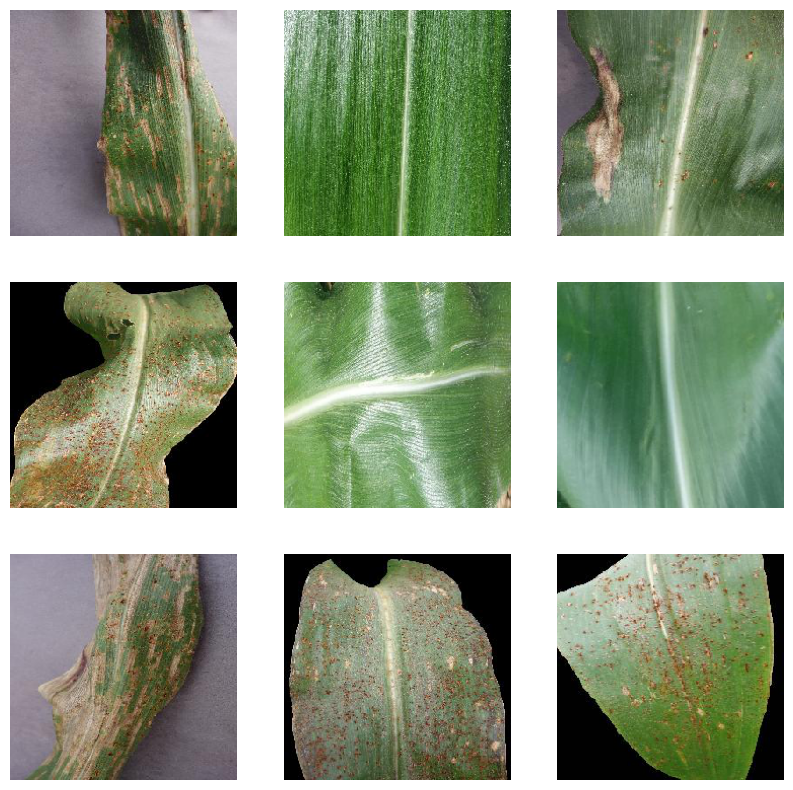

In [13]:
# Visualizar algumas imagens
images, labels = next(train_data)

# Plotar as primeiras 9 imagens do lote
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()


## Definindo o Modelo 

In [14]:
# Definindo o modelo usando MobileNetV2
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Congelar as camadas pré-treinadas


In [15]:
# Criar o modelo final
model = models.Sequential([
    base_model,  # Base do modelo pré-treinado
    layers.GlobalAveragePooling2D(),  # Reduzir as dimensões
    layers.Dense(128, activation='relu'),  # Camada densa com 128 neurônios
    layers.Dense(4, activation='softmax')  # 4 classes (Blight, Common_Rust, Gray_Leaf_Spot, Healthy)
])

## Treinando o Modelo

In [16]:
# Compilando o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinando o modelo
history = model.fit(
    train_data,          # Dados de treinamento
    validation_data=test_data,  # Dados de teste
    epochs=10            # Número de épocas para treinamento
)


Epoch 1/10


E:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


105/105 ━━━━━━━━━━━━━━━━━━━━ 96s 858ms/step - accuracy: 0.7821 - loss: 0.5417 - val_accuracy: 0.9199 - val_loss: 0.2135
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 95s 905ms/step - accuracy: 0.9260 - loss: 0.1892 - val_accuracy: 0.9258 - val_loss: 0.1949
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 94s 900ms/step - accuracy: 0.9524 - loss: 0.1265 - val_accuracy: 0.9234 - val_loss: 0.2090
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 94s 898ms/step - accuracy: 0.9588 - loss: 0.1033 - val_accuracy: 0.9258 - val_loss: 0.2016
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 93s 891ms/step - accuracy: 0.9722 - loss: 0.0755 - val_accuracy: 0.9151 - val_loss: 0.2531
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 95s 902ms/step - accuracy: 0.9870 - loss: 0.0455 - val_accuracy: 0.9294 - val_loss: 0.2231
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 101s 960ms/step - accuracy: 0.9856 - loss: 0.0463 - val_accuracy: 0.9270 - val_loss: 0.2461
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.9930 - loss: 0.0329 - val_

In [18]:
#Avaliar a acurácia do modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_data)

# Exibir a acurácia do modelo
print(f"Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%")


27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 732ms/step - accuracy: 0.9308 - loss: 0.2997
Acurácia no conjunto de teste: 93.18%


In [26]:
# Contar as ocorrências das classes no conjunto de treino
train_class_counts = np.bincount(train_data.classes)
train_class_names = list(train_data.class_indices.keys())
total_train_images = len(train_data.classes)
total_test_images = len(test_data.classes)
print("---------------------------------------------------------------\n")
print("Distribuição das classes no conjunto de treino:")
for class_name, count in zip(train_class_names, train_class_counts):
    percentage = (count / total_train_images) * 100
    print(f"{class_name}: {count} imagens ({percentage:.2f}%)")
print("---------------------------------------------------------------\n")
print("Distribuição das classes no conjunto de teste:")
for class_name, count in zip(test_class_names, test_class_counts):
    percentage = (count / total_test_images) * 100
    print(f"{class_name}: {count} imagens ({percentage:.2f}%)")
print("---------------------------------------------------------------\n")

---------------------------------------------------------------

Distribuição das classes no conjunto de treino:
Blight: 917 imagens (27.36%)
Common_Rust: 1045 imagens (31.18%)
Gray_Leaf_Spot: 460 imagens (13.72%)
Healthy: 930 imagens (27.74%)
---------------------------------------------------------------

Distribuição das classes no conjunto de teste:
Blight: 229 imagens (27.39%)
Common_Rust: 261 imagens (31.22%)
Gray_Leaf_Spot: 114 imagens (13.64%)
Healthy: 232 imagens (27.75%)
---------------------------------------------------------------



## Importação de Imagem para ser Prevista

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
A classe prevista para a imagem é: Gray_Leaf_Spot


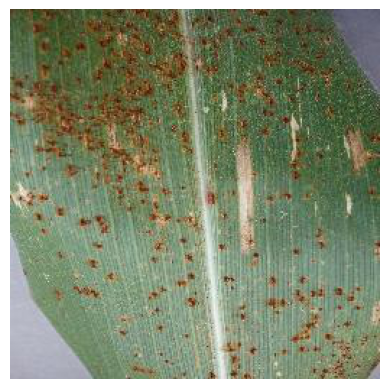

In [32]:
# Função para carregar e preparar a imagem
def prepare_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Redimensionar a imagem
    img_array = image.img_to_array(img)  # Converter a imagem em um array numpy
    img_array = np.expand_dims(img_array, axis=0)  # Adicionar uma dimensão extra para a batch
    img_array = img_array / 255.0  # Normalizar os valores da imagem
    return img_array

# Caminho para a imagem que você deseja classificar
image_path = "C:\\Users\\guigu\\Jupyter\\Detecção de Doenças no Milho utilizando Redes Neurais\\data\\Gray_Leaf_Spot\\Corn_Gray_Spot (58).JPG"

# Preparar a imagem
prepared_image = prepare_image(image_path)

# Fazer a previsão
predictions = model.predict(prepared_image)

# Obter a classe com a maior probabilidade
predicted_class = np.argmax(predictions, axis=1)

# Nome das classes
class_names = ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

# Exibir o resultado
print(f"A classe prevista para a imagem é: {class_names[predicted_class[0]]}")

# Exibir a imagem para visualização
img = image.load_img(image_path)
plt.imshow(img)
plt.axis('off')  # Não exibir os eixos
plt.show()
